In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 150

class nflDF:

    def __init__(self):
        QB = pd.read_csv("QB_df")
        self.QB = QB.iloc[:,1:]
        RB = pd.read_csv("RB_df")
        self.RB = RB.iloc[:,1:]
        WR = pd.read_csv("WR_df")
        self.WR = WR.iloc[:,1:]
        TE = pd.read_csv("TE_df")
        self.TE = TE.iloc[:,1:]

In [2]:
pbp_2009 = pd.read_csv("reg_pbp_2009.csv")
pbp_2010 = pd.read_csv("reg_pbp_2010.csv")
pbp_2011 = pd.read_csv("reg_pbp_2011.csv")
pbp_2012 = pd.read_csv("reg_pbp_2012.csv")
pbp_2013 = pd.read_csv("reg_pbp_2013.csv")
pbp_2014 = pd.read_csv("reg_pbp_2014.csv")
pbp_2015 = pd.read_csv("reg_pbp_2015.csv")
pbp_2016 = pd.read_csv("reg_pbp_2016.csv")
pbp_2017 = pd.read_csv("reg_pbp_2017.csv")
pbp_2018 = pd.read_csv("reg_pbp_2018.csv")
pbp_2009['season'] = 2009
pbp_2010['season'] = 2010
pbp_2011['season'] = 2011
pbp_2012['season'] = 2012
pbp_2013['season'] = 2013
pbp_2014['season'] = 2014
pbp_2015['season'] = 2015
pbp_2016['season'] = 2016
pbp_2017['season'] = 2017
pbp_2018['season'] = 2018

pbp_2009_ay = pbp_2009[['season','posteam','defteam','desc','pass_attempt','air_yards']]
pbp_2010_ay = pbp_2010[['season','posteam','defteam','desc','pass_attempt','air_yards']]
pbp_2011_ay = pbp_2011[['season','posteam','defteam','desc','pass_attempt','air_yards']]
pbp_2012_ay = pbp_2012[['season','posteam','defteam','desc','pass_attempt','air_yards']]
pbp_2013_ay = pbp_2013[['season','posteam','defteam','desc','pass_attempt','air_yards']]
pbp_2014_ay = pbp_2014[['season','posteam','defteam','desc','pass_attempt','air_yards']]
pbp_2015_ay = pbp_2015[['season','posteam','defteam','desc','pass_attempt','air_yards']]
pbp_2016_ay = pbp_2016[['season','posteam','defteam','desc','pass_attempt','air_yards']]
pbp_2017_ay = pbp_2017[['season','posteam','defteam','desc','pass_attempt','air_yards']]
pbp_nflScrapr = pd.concat([pbp_2009_ay,pbp_2010_ay,pbp_2011_ay,pbp_2012_ay,pbp_2012_ay,pbp_2013_ay,pbp_2014_ay,pbp_2015_ay,pbp_2016_ay,pbp_2017_ay])
pbp_nflScrapr = pbp_nflScrapr[pbp_nflScrapr['posteam'].notnull()]
pbp_nflScrapr = pbp_nflScrapr[pbp_nflScrapr['pass_attempt']==1]
pbp_nflScrapr = pbp_nflScrapr.fillna(0)

pbp_master = pd.read_csv("PBP.csv")
game = pd.read_csv("GAME.csv")
pbp_master = pd.merge(pbp_master,game[['gid','seas']],how='left',left_on='gid',right_on='gid')

pbp_master = pd.merge(pbp_master,pbp_nflScrapr[['season','posteam','defteam','desc','air_yards']],how='left',left_on=['seas','off','def','detail'],right_on=['season','posteam','defteam','desc'])

In [3]:
player = pd.read_csv('PLAYER.csv')


pbp_master = pd.merge(pbp_master,player[['player','pos1']],how='left',left_on='bc',right_on='player')
pbp_master = pd.merge(pbp_master,player[['player','pos1']],how='left',left_on='psr',right_on='player')
pbp_master = pd.merge(pbp_master,player[['player','pos1']],how='left',left_on='trg',right_on='player')

In [4]:
pbp_master = pbp_master.rename(columns={'player_x':'Rusher','pos1_x':'Rusher Position','player_y':'Passer','pos1_y':'Passer Position','player':'Receiver','pos1':'Receiver Position'})

In [5]:
def calculateSeconds(row):
    return (4-row['qtr'])*15*60+(row['min']*60)+row['sec']

In [43]:
pbp_master=pbp_master[pbp_master['seas']>=2010]
pbp_master['season_classified']=pbp_master['seas'].apply(lambda x: x-2009)
pbp_master['Goal Line']=pbp_master['yfog'].apply(lambda x: 1 if x==99 else 0)
pbp_master['Goal Line Success']=pbp_master[['pts','yfog']].apply(lambda x:1 if (x['yfog']==99) & (x['pts']>0) else 0,axis=1)
pbp_master['Inside 5']=pbp_master['yfog'].apply(lambda x: 1 if (x>=95) & (x<99) else 0)
pbp_master['Inside 5 Success']=pbp_master[['pts','yfog']].apply(lambda x:1 if ((x['yfog']>=95)&(x['yfog']<99)) & (x['pts']>0) else 0,axis=1)
pbp_master['Inside 10']=pbp_master['yfog'].apply(lambda x: 1 if (x>=90) & (x<95) else 0)
pbp_master['Inside 10 Success']=pbp_master[['pts','yfog']].apply(lambda x:1 if ((x['yfog']>=90)&(x['yfog']<95)) & (x['pts']>0) else 0,axis=1)
pbp_master['Inside 20']=pbp_master['yfog'].apply(lambda x: 1 if (x>=80) & (x<90) else 0)
pbp_master['Inside 20 Success']=pbp_master[['pts','yfog']].apply(lambda x:1 if ((x['yfog']>=80)&(x['yfog']<90)) & (x['pts']>0) else 0,axis=1)
pbp_master['Winning'] = pbp_master[['ptso','ptsd']].apply(lambda x: 1 if x['ptso']>x['ptsd'] else 0, axis=1)
pbp_master['Losing'] = pbp_master[['ptso','ptsd']].apply(lambda x: 1 if x['ptso']<x['ptsd'] else 0, axis=1)
pbp_master['Tied'] = pbp_master[['ptso','ptsd']].apply(lambda x: 1 if x['ptso']==x['ptsd'] else 0, axis=1)
pbp_master['Scoring Differential']= pbp_master[['ptso','ptsd']].apply(lambda x: x['ptso']-x['ptsd'], axis=1)
pbp_master['Time Remaining (seconds)'] = pbp_master[['qtr','min','sec']].apply(calculateSeconds,axis=1)
pbp_master['sg'] = pbp_master['sg'].fillna(0).apply(lambda x: 1 if x=='Y' else 0)
pbp_master['nh'] = pbp_master['nh'].fillna(0).apply(lambda x: 1 if x=='Y' else 0)

In [123]:
def runFantasyPoints(row, fumble=-1):
    if row['type']=='RUSH':
        if row['fum']=='None':
            if row['pts']=='None':
                try:
                    return row['yds']*.1
                except:
                    return 0
            elif row['pts']>=6:
                try:
                    return row['yds']*.1 +6
                except:
                    return 6
            else:
                try:
                    return row['yds']*.1
                except: return 0
        #recovered own fumble
        elif (row['fum']!='None') & (row['fum']==row['frcv']):
            if row['pts']=='None':
                try:
                    return row['yds']*.1
                except:
                    return 0
            elif row['pts']>=6:
                try:
                    return row['yds']*.1 +6
                except:
                    return 6
            else:
                try:
                    return row['yds']*.1
                except:
                    return 0
        #fumble that player on defensive team recovers: -2 for the fumble
        elif (row['fum']!='None') & (row['fry']!='None'):
            try:
                return row['yds']*.1 + fumble
            except:
                return fumble
        #fumble that player on own team recovered.
        else:
            try:
                return row['yds']*.1
            except:
                return 0
    else:
        return 0
    
def passFantasyPoints(row, passTD = 4, fumble = -1, interception=-1):
    if row['type']=='PASS':
        #no fumble or interception, regular pass
        if (row['fum']=='None') & (row['ints']=='None'):
            if row['pts']=='None':
                try:
                    return row['yds']*.04
                except:
                    return 0
            elif row['pts']>=6:
                try:
                    return row['yds']*.04 +passTD
                except:
                    return passTD
            else:
                try:
                    return row['yds']*.04
                except:
                    return 0
        #interception, negative points
        elif row['ints']!='None':
            return interception
        #quartberback fumbles. Negative points for rush yards and fumble
        elif (row['fum']==row['Passer']) & (row['fry']!='None'):
            try:
                return row['yds']*.1+fumble
            except:
                return fumble
        #sack, negative points for rush yards
        elif (row['sk1']!='None') & (row['yds']!='None'):
            try:
                return row['yds']*.1
            except:
                return 0
        else:
            return 0
    else:
        return 0

def recFantasyPoints(row, fumble = -1,ppr=.5):
    if row['type']=='PASS':
    #no fumble, regular catch
        if row['Receiver']=='None':
            return 0
        elif (row['fum']=='None') & (row['ints']=='None'):
            if row['Receiver']!='None':
                if row['pts']=='None':
                    try:
                        return row['yds']*.1 + ppr
                    except:
                        return 0
                elif row['pts']>=6:
                    try:
                        return row['yds']*.1 +6 + ppr
                    except:
                        return 6 + ppr
                else:
                    try:
                        return row['yds']*.1 + ppr
                    except:
                        return 0
        #recovered own fumble
        elif (row['fum']!='None') & (row['fum']==row['frcv']) & (row['Receiver']!='None'):
            if row['pts']=='None':
                try:
                    return row['yds']*.1 + ppr
                except:
                    return 0
            elif row['pts']>=6:
                try:
                    return row['yds']*.1 + 6 + ppr
                except:
                    return 6 + ppr
            else:
                try:
                    return row['yds']*.1 + ppr
                except:
                    return 0
        #fumble that player on defensive team recovers: negative points for the fumble
        elif (row['fum']==row['Receiver']) & (row['fry']!='None'):
            try:
                return row['yds']*.1 + fumble + ppr
            except:
                return fumble + ppr
        #fumble that player on own team recovered.
        else: 
            try:
                return row['yds']*.1 + ppr
            except:
                return 0
    else: 
        return 0
        

Runs = pbp_master[(pbp_master['type']=='RUSH')]
Passes = pbp_master[(pbp_master['type']=='PASS')]
Runs['Rush_FP'] = Runs[['type','fum','yds','pts','frcv','fry']].fillna('None').apply(runFantasyPoints, axis=1)
Passes['Pass_FP'] = Passes[['type','fum','ints','yds','pts','frcv','fry','sk1','Passer']].fillna('None').apply(passFantasyPoints,axis=1)
Passes['Rec_FP'] = Passes[['type','fum','ints','yds','pts','frcv','fry','Receiver']].fillna('None').apply(recFantasyPoints,axis=1)

In [327]:
print("Total Pass Plays:" + str(len(Passes)))
print("Total Pass Plays w/ Air Yards stats:"+ str(len(Passes[Passes.air_yards.notnull()])))

Total Pass Plays:174143
Total Pass Plays w/ Air Yards stats:139445


In [329]:
#filter out plays w/o Air Yards stats b/c I think this is a very important metric for evaluating the opportunity of throw/catch
Passes = Passes[Passes.air_yards.notnull()]

In [415]:
RB_runs = Runs[(Runs['type']=='RUSH') & (Runs['Rusher Position']=='RB')]
QB_runs = Runs[(Runs['type']=='RUSH') & (Runs['Rusher Position']=='QB')]
WR_runs = Runs[(Runs['type']=='RUSH') & (Runs['Rusher Position']=='WR')]
TE_runs = Runs[(Runs['type']=='RUSH') & (Runs['Rusher Position']=='TE')]

RB_passes = Passes[(Passes['type']=='PASS') & (Passes['Passer Position']=='RB')]
QB_passes = Passes[(Passes['type']=='PASS') & (Passes['Passer Position']=='QB')]
WR_passes = Passes[(Passes['type']=='PASS') & (Passes['Passer Position']=='WR')]
TE_passes = Passes[(Passes['type']=='PASS') & (Passes['Passer Position']=='TE')]

RB_receiver = Passes[(Passes['type']=='PASS') & (Passes['Receiver Position']=='RB')]
QB_receiver = Passes[(Passes['type']=='PASS') & (Passes['Receiver Position']=='QB')]
WR_receiver = Passes[(Passes['type']=='PASS') & (Passes['Receiver Position']=='WR')]
TE_receiver = Passes[(Passes['type']=='PASS') & (Passes['Receiver Position']=='TE')]

In [306]:
RB_runs = RB_runs[['gid','Rusher','Rusher Position','off','def','dseq','Time Remaining (seconds)','Scoring Differential','Winning','Losing','Tied','dwn','ytg','yfog','zone','sg','nh','season_classified','Goal Line','Inside 5','Inside 10','Inside 20','Rush_FP']]
QB_runs = QB_runs[['gid','Rusher','Rusher Position','off','def','dseq','Time Remaining (seconds)','Scoring Differential','Winning','Losing','Tied','dwn','ytg','yfog','zone','sg','nh','season_classified','Goal Line','Inside 5','Inside 10','Inside 20','Rush_FP']]
WR_runs = WR_runs[['gid','Rusher','Rusher Position','off','def','dseq','Time Remaining (seconds)','Scoring Differential','Winning','Losing','Tied','dwn','ytg','yfog','zone','sg','nh','season_classified','Goal Line','Inside 5','Inside 10','Inside 20','Rush_FP']]
TE_runs = TE_runs[['gid','Rusher','Rusher Position','off','def','dseq','Time Remaining (seconds)','Scoring Differential','Winning','Losing','Tied','dwn','ytg','yfog','zone','sg','nh','season_classified','Goal Line','Inside 5','Inside 10','Inside 20','Rush_FP']]

# Import Models

In [303]:
#MachineLearning
import sklearn as sk
from sklearn import model_selection as sk_ms
from sklearn import linear_model as lm
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score

import statsmodels.api as sm

# Plotting functions
import matplotlib.pyplot as plt
import seaborn as sns

#pickle
import pickle

kf = KFold(n_splits = 5, shuffle = True, random_state = 123)

# Modelling Opportunity Score for RB Runs

In [230]:
print("Total RB Runs from 2010-2017: "+ str(len(RB_runs)))

Total RB Runs from 2010-2017: 98649


In [237]:
RB_runs = RB_runs.set_index(['gid','Rusher','Rusher Position','off','def'])

In [232]:
RB_runs_linear = RB_runs
RB_runs_linear['2010'] = RB_runs_linear['season_classified'].apply(lambda x: 1 if x==1 else 0)
RB_runs_linear['2011'] = RB_runs_linear['season_classified'].apply(lambda x: 1 if x==2 else 0)
RB_runs_linear['2012'] = RB_runs_linear['season_classified'].apply(lambda x: 1 if x==3 else 0)
RB_runs_linear['2013'] = RB_runs_linear['season_classified'].apply(lambda x: 1 if x==4 else 0)
RB_runs_linear['2014'] = RB_runs_linear['season_classified'].apply(lambda x: 1 if x==5 else 0)
RB_runs_linear['2015'] = RB_runs_linear['season_classified'].apply(lambda x: 1 if x==6 else 0)
RB_runs_linear['2016'] = RB_runs_linear['season_classified'].apply(lambda x: 1 if x==7 else 0)
RB_runs_linear = RB_runs_linear.drop(columns=['season_classified','Rush_FP'])
RB_runs_linear['Rush_FP']=RB_runs['Rush_FP']

# Linear Model

In [277]:
train, evaluation = train_test_split(RB_runs_linear, test_size = 0.3,random_state=123)
x_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1:]
x_evaluation = evaluation.iloc[:,:-1]
y_evaluation = evaluation.iloc[:,-1:]

in_sample_scores=[]
out_of_sample_scores=[]
for train_index, test_index  in kf.split(train):
    linear_model.fit(x_train.iloc[train_index],y_train.iloc[train_index])
    in_sample_scores.append(linear_model.score(x_train.iloc[train_index],y_train.iloc[train_index]))
    out_of_sample_scores.append(linear_model.score(x_train.iloc[test_index],y_train.iloc[test_index]))
print("In Sample Logistic Regression Score:" + str(np.asarray(in_sample_scores).mean()))
print("Out of Sample Logistic Regression Score: " + str(np.asarray(out_of_sample_scores).mean()))

In Sample Logistic Regression Score:0.11777281330798639
Out of Sample Logistic Regression Score: 0.11666215321897466


In [278]:
linear_model.fit(x_train,y_train)
linear_model.score(x_evaluation,y_evaluation)

0.11993270798947507

# Random Forest and Gradient Boosted Tree Models

Random Forest

In [238]:
train, evaluation = train_test_split(RB_runs, test_size = 0.3,random_state=123)
x_train_trees = train.iloc[:,:-1]
y_train_trees = train.iloc[:,-1:]
x_evaluation_trees = evaluation.iloc[:,:-1]
y_evaluation_trees = evaluation.iloc[:,-1:]

RB_runs_grid_search_rf = sk_ms.GridSearchCV( estimator = RandomForestRegressor(n_estimators=200, random_state=123),
                        param_grid = {'max_depth':[1,2,3,4,5,6,7,8,9,10]},
                        scoring = 'r2',
                        cv = sk_ms.KFold(n_splits = 5, shuffle = True, random_state = 123),
                        refit = True,
                        return_train_score = True)

RB_runs_grid_search_rf = grid_search_rf.fit(X = x_train_trees,
                                            y = y_train_trees)

C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528:

C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528:

In [239]:
RB_runs_grid_search_rf.best_params_

{'max_depth': 3}

In [240]:
best_predictions = RB_runs_grid_search_rf.predict(x_evaluation_trees)

print( r2_score( y_evaluation_trees, best_predictions ) )

0.12203282942618265


Gradient Boosted Tree

In [241]:
# Note the depths we'll want to test
max_depths = [1, 2, 3, 4, 5]

# Create a list to store the best out-of-sample score and
# the optimal number of trees for each tree depth
output = { i : {'score':None, 'n_trees':None} for i in max_depths}

# Specify the maximum number of trees
max_trees = 200

In [242]:
for i in max_depths:
    # Create a list to store staged predictions for the models
    # in each of the folds, as well as the true outcomes
    staged_preds = []
    
    # Create the folds
    folds = sk_ms.KFold(n_splits = 5, shuffle = True, random_state = 123)
    
    # Go through each fold and train a model
    for train_index, test_index in folds.split(train):
        RB_runs_GBR_model = GradientBoostingRegressor(n_estimators = max_trees,
                                              max_depth = i,
                                              learning_rate = 0.1,
                                              random_state = 123)
        RB_runs_GBR_model.fit(x_train_trees.iloc[train_index], y_train_trees.iloc[train_index] )
        
        staged_preds.append( {'staged_preds':list(RB_runs_GBR_model.staged_predict( x_train_trees.iloc[test_index] )),
                                  'true_outcomes':y_train_trees.iloc[test_index].copy() } )
    
    # Now find the average over all five folds for each number
    # of possible trees
    scores = np.zeros(max_trees)
    for j in range(max_trees):
        
        for fold in staged_preds:
            pred_outcomes = [k for k in fold['staged_preds'][j]]
            
            scores[j] = scores[j] + r2_score( fold['true_outcomes'].values, pred_outcomes )
    
        scores[j] = scores[j] * 1.0 / 5
    
    # Find the optimal number of trees for this depth
    best_n_trees = np.argmax(scores)
    
    # Output the result
    output[i]['n_trees'] = best_n_trees + 1
    output[i]['score'] = scores[best_n_trees]

C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

In [243]:
# Find the best tree depth and and re-fit it on the full
# training data
best_score = max([output[i]['score'] for i in output])
best_depth = [i for i in output if output[i]['score'] == best_score][0]
print(f'Best depth:      {best_depth}')
print(f'Number of trees: {output[best_depth]["n_trees"]}')

Best depth:      1
Number of trees: 191


In [246]:
RB_runs_boosted_tree = GradientBoostingRegressor(n_estimators = output[best_depth]['n_trees'],
                                                                  max_depth = best_depth,
                                                                  learning_rate = 0.1,
                                                                  random_state = 123)
RB_runs_boosted_tree = boosted_tree.fit(x_train_trees, y_train_trees)
print("RB_runs boosted tree score: " + str(RB_runs_boosted_tree.score(x_evaluation_trees,y_evaluation_trees)))

C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RB_runs boosted tree score: 0.12383952467697878


In [247]:
filename = 'RB_Runs_finalized_model.sav'
pickle.dump(RB_runs_boosted_tree, open(filename, 'wb'))

In [248]:
loaded_model = pickle.load(open(filename, 'rb'))

In [249]:
print("RB_runs boosted tree score: " + str(loaded_model.score(x_evaluation_trees,y_evaluation_trees)))

RB_runs boosted tree score: 0.12383952467697878


Text(0.5, 0, 'Relative Importance')

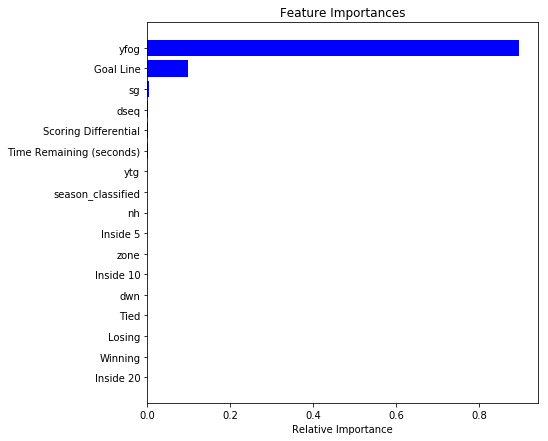

In [252]:
feature_importances = pd.DataFrame(loaded_model.feature_importances_,
                                   index = x_train_trees.columns,
                                    columns=['importance']).sort_values('importance',ascending=True)

plt.figure(figsize=(7,7))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances.loc[:,'importance'], color='b', align='center',)
plt.yticks(range(len(feature_importances)),feature_importances.index)
plt.xlabel('Relative Importance')

# Modelling Opportunity Score for QB Runs

In order to successfully model for QB Runs, we need to bring in some athletic metric that indicates QB is a dual threat. This is key because there is a clear distinction between dual threats (Run/Pass i.e. Cam Newtown) and pure passers (i.e. Tom Brady)

In [281]:
QB_runs = pd.merge(QB_runs,player[['player','height','weight','forty','vertical']], how='left',left_on='Rusher',right_on='player')
QB_runs = QB_runs.drop(columns=['player'])
temp = QB_runs['Rush_FP']
QB_runs = QB_runs.drop(columns=['Rush_FP'])
QB_runs['Rush_FP'] = temp

In [282]:
print("Total RB Runs from 2010-2017: "+ str(len(QB_runs)))

Total RB Runs from 2010-2017: 13260


In [283]:
QB_runs = QB_runs.set_index(['gid','Rusher','Rusher Position','off','def'])

In [269]:
QB_runs_linear = QB_runs
QB_runs_linear['2010'] = QB_runs_linear['season_classified'].apply(lambda x: 1 if x==1 else 0)
QB_runs_linear['2011'] = QB_runs_linear['season_classified'].apply(lambda x: 1 if x==2 else 0)
QB_runs_linear['2012'] = QB_runs_linear['season_classified'].apply(lambda x: 1 if x==3 else 0)
QB_runs_linear['2013'] = QB_runs_linear['season_classified'].apply(lambda x: 1 if x==4 else 0)
QB_runs_linear['2014'] = QB_runs_linear['season_classified'].apply(lambda x: 1 if x==5 else 0)
QB_runs_linear['2015'] = QB_runs_linear['season_classified'].apply(lambda x: 1 if x==6 else 0)
QB_runs_linear['2016'] = QB_runs_linear['season_classified'].apply(lambda x: 1 if x==7 else 0)
QB_runs_linear = QB_runs_linear.drop(columns=['season_classified','Rush_FP'])
QB_runs_linear['Rush_FP']=QB_runs['Rush_FP']

# Linear Regression

In [275]:
linear_model = linear_model.LinearRegression()

train, evaluation = train_test_split(QB_runs_linear, test_size = 0.3,random_state=123)
x_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1:]
x_evaluation = evaluation.iloc[:,:-1]
y_evaluation = evaluation.iloc[:,-1:]

in_sample_scores=[]
out_of_sample_scores=[]
for train_index, test_index  in kf.split(train):
    linear_model.fit(x_train.iloc[train_index],y_train.iloc[train_index])
    in_sample_scores.append(linear_model.score(x_train.iloc[train_index],y_train.iloc[train_index]))
    out_of_sample_scores.append(linear_model.score(x_train.iloc[test_index],y_train.iloc[test_index]))
print("In Sample Logistic Regression Score:" + str(np.asarray(in_sample_scores).mean()))
print("Out of Sample Logistic Regression Score: " + str(np.asarray(out_of_sample_scores).mean()))

In Sample Logistic Regression Score:0.23604420693114103
Out of Sample Logistic Regression Score: 0.2262876584331272


# Random Forest and Gradient Boosted Tree Models

Random Forest

In [286]:
train, evaluation = train_test_split(QB_runs, test_size = 0.3,random_state=123)
x_train_trees = train.iloc[:,:-1]
y_train_trees = train.iloc[:,-1:]
x_evaluation_trees = evaluation.iloc[:,:-1]
y_evaluation_trees = evaluation.iloc[:,-1:]

QB_runs_grid_search_rf = sk_ms.GridSearchCV( estimator = RandomForestRegressor(n_estimators=200, random_state=123),
                        param_grid = {'max_depth':[1,2,3,4,5,6,7,8,9,10]},
                        scoring = 'r2',
                        cv = sk_ms.KFold(n_splits = 5, shuffle = True, random_state = 123),
                        refit = True,
                        return_train_score = True)

QB_runs_grid_search_rf = grid_search_rf.fit(X = x_train_trees,
                                            y = y_train_trees)

C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528:

C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528:

In [287]:
QB_runs_grid_search_rf.best_params_

{'max_depth': 5}

In [288]:
best_predictions = QB_runs_grid_search_rf.predict(x_evaluation_trees)

print( r2_score( y_evaluation_trees, best_predictions ) )

0.2971846400311432


Gradient Boosted Trees

In [290]:
# Note the depths we'll want to test
max_depths = [1, 2, 3, 4, 5]

# Create a list to store the best out-of-sample score and
# the optimal number of trees for each tree depth
output = { i : {'score':None, 'n_trees':None} for i in max_depths}

# Specify the maximum number of trees
max_trees = 200

In [291]:
for i in max_depths:
    # Create a list to store staged predictions for the models
    # in each of the folds, as well as the true outcomes
    staged_preds = []
    
    # Create the folds
    folds = sk_ms.KFold(n_splits = 5, shuffle = True, random_state = 123)
    
    # Go through each fold and train a model
    for train_index, test_index in folds.split(train):
        QB_runs_GBR_model = GradientBoostingRegressor(n_estimators = max_trees,
                                              max_depth = i,
                                              learning_rate = 0.1,
                                              random_state = 123)
        QB_runs_GBR_model.fit(x_train_trees.iloc[train_index], y_train_trees.iloc[train_index] )
        
        staged_preds.append( {'staged_preds':list(QB_runs_GBR_model.staged_predict( x_train_trees.iloc[test_index] )),
                                  'true_outcomes':y_train_trees.iloc[test_index].copy() } )
    
    # Now find the average over all five folds for each number
    # of possible trees
    scores = np.zeros(max_trees)
    for j in range(max_trees):
        
        for fold in staged_preds:
            pred_outcomes = [k for k in fold['staged_preds'][j]]
            
            scores[j] = scores[j] + r2_score( fold['true_outcomes'].values, pred_outcomes )
    
        scores[j] = scores[j] * 1.0 / 5
    
    # Find the optimal number of trees for this depth
    best_n_trees = np.argmax(scores)
    
    # Output the result
    output[i]['n_trees'] = best_n_trees + 1
    output[i]['score'] = scores[best_n_trees]

C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

In [292]:
# Find the best tree depth and and re-fit it on the full
# training data
best_score = max([output[i]['score'] for i in output])
best_depth = [i for i in output if output[i]['score'] == best_score][0]
print(f'Best depth:      {best_depth}')
print(f'Number of trees: {output[best_depth]["n_trees"]}')

Best depth:      3
Number of trees: 41


In [293]:
QB_runs_boosted_tree = GradientBoostingRegressor(n_estimators = output[best_depth]['n_trees'],
                                                                  max_depth = best_depth,
                                                                  learning_rate = 0.1,
                                                                  random_state = 123)
QB_runs_boosted_tree = boosted_tree.fit(x_train_trees, y_train_trees)
print("QB_runs boosted tree score: " + str(QB_runs_boosted_tree.score(x_evaluation_trees,y_evaluation_trees)))

C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


QB_runs boosted tree score: 0.2621980569057697


In [294]:
best_rf = QB_runs_grid_search_rf.best_estimator_

Text(0.5, 0, 'Relative Importance')

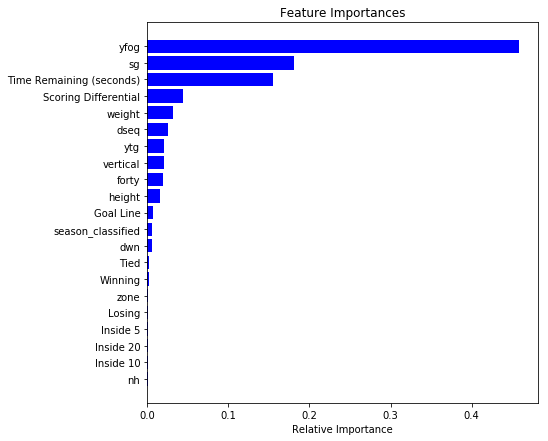

In [295]:
feature_importances = pd.DataFrame(best_rf.feature_importances_,
                                   index = x_train_trees.columns,
                                    columns=['importance']).sort_values('importance',ascending=True)

plt.figure(figsize=(7,7))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances.loc[:,'importance'], color='b', align='center',)
plt.yticks(range(len(feature_importances)),feature_importances.index)
plt.xlabel('Relative Importance')

In [296]:
filename = 'QB_Runs_finalized_model.sav'
pickle.dump(QB_runs_grid_search_rf, open(filename, 'wb'))

# Modelling Opportunity Score for WR Runs

In [299]:
print("Total RB Runs from 2010-2017: "+ str(len(WR_runs)))

Total RB Runs from 2010-2017: 2433


In [308]:
WR_runs = WR_runs.set_index(['gid','Rusher','Rusher Position','off','def'])

In [301]:
WR_runs_linear = WR_runs
WR_runs_linear['2010'] = WR_runs_linear['season_classified'].apply(lambda x: 1 if x==1 else 0)
WR_runs_linear['2011'] = WR_runs_linear['season_classified'].apply(lambda x: 1 if x==2 else 0)
WR_runs_linear['2012'] = WR_runs_linear['season_classified'].apply(lambda x: 1 if x==3 else 0)
WR_runs_linear['2013'] = WR_runs_linear['season_classified'].apply(lambda x: 1 if x==4 else 0)
WR_runs_linear['2014'] = WR_runs_linear['season_classified'].apply(lambda x: 1 if x==5 else 0)
WR_runs_linear['2015'] = WR_runs_linear['season_classified'].apply(lambda x: 1 if x==6 else 0)
WR_runs_linear['2016'] = WR_runs_linear['season_classified'].apply(lambda x: 1 if x==7 else 0)
WR_runs_linear = WR_runs_linear.drop(columns=['season_classified','Rush_FP'])
WR_runs_linear['Rush_FP']=WR_runs['Rush_FP']

# Linear Regression

In [304]:
linear_model = lm.LinearRegression()

train, evaluation = train_test_split(WR_runs_linear, test_size = 0.3,random_state=123)
x_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1:]
x_evaluation = evaluation.iloc[:,:-1]
y_evaluation = evaluation.iloc[:,-1:]

in_sample_scores=[]
out_of_sample_scores=[]
for train_index, test_index  in kf.split(train):
    linear_model.fit(x_train.iloc[train_index],y_train.iloc[train_index])
    in_sample_scores.append(linear_model.score(x_train.iloc[train_index],y_train.iloc[train_index]))
    out_of_sample_scores.append(linear_model.score(x_train.iloc[test_index],y_train.iloc[test_index]))
print("In Sample Logistic Regression Score:" + str(np.asarray(in_sample_scores).mean()))
print("Out of Sample Logistic Regression Score: " + str(np.asarray(out_of_sample_scores).mean()))

In Sample Logistic Regression Score:0.04509553050404784
Out of Sample Logistic Regression Score: 0.008972651840417824


# Random Forest and Gradient Boosted Tree Models

Random Forest

In [309]:
train, evaluation = train_test_split(WR_runs, test_size = 0.3,random_state=123)
x_train_trees = train.iloc[:,:-1]
y_train_trees = train.iloc[:,-1:]
x_evaluation_trees = evaluation.iloc[:,:-1]
y_evaluation_trees = evaluation.iloc[:,-1:]

WR_runs_grid_search_rf = sk_ms.GridSearchCV( estimator = RandomForestRegressor(n_estimators=200, random_state=123),
                        param_grid = {'max_depth':[1,2,3,4,5,6,7,8,9,10]},
                        scoring = 'r2',
                        cv = sk_ms.KFold(n_splits = 5, shuffle = True, random_state = 123),
                        refit = True,
                        return_train_score = True)

WR_runs_grid_search_rf = grid_search_rf.fit(X = x_train_trees,
                                            y = y_train_trees)

C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528:

C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528:

In [310]:
WR_runs_grid_search_rf.best_params_

{'max_depth': 1}

In [311]:
best_predictions = WR_runs_grid_search_rf.predict(x_evaluation_trees)

print( r2_score( y_evaluation_trees, best_predictions ) )

0.017924909800637434


Gradient Boosted Trees

In [312]:
# Note the depths we'll want to test
max_depths = [1, 2, 3, 4, 5]

# Create a list to store the best out-of-sample score and
# the optimal number of trees for each tree depth
output = { i : {'score':None, 'n_trees':None} for i in max_depths}

# Specify the maximum number of trees
max_trees = 200

In [313]:
for i in max_depths:
    # Create a list to store staged predictions for the models
    # in each of the folds, as well as the true outcomes
    staged_preds = []
    
    # Create the folds
    folds = sk_ms.KFold(n_splits = 5, shuffle = True, random_state = 123)
    
    # Go through each fold and train a model
    for train_index, test_index in folds.split(train):
        WR_runs_GBR_model = GradientBoostingRegressor(n_estimators = max_trees,
                                              max_depth = i,
                                              learning_rate = 0.1,
                                              random_state = 123)
        WR_runs_GBR_model.fit(x_train_trees.iloc[train_index], y_train_trees.iloc[train_index] )
        
        staged_preds.append( {'staged_preds':list(WR_runs_GBR_model.staged_predict( x_train_trees.iloc[test_index] )),
                                  'true_outcomes':y_train_trees.iloc[test_index].copy() } )
    
    # Now find the average over all five folds for each number
    # of possible trees
    scores = np.zeros(max_trees)
    for j in range(max_trees):
        
        for fold in staged_preds:
            pred_outcomes = [k for k in fold['staged_preds'][j]]
            
            scores[j] = scores[j] + r2_score( fold['true_outcomes'].values, pred_outcomes )
    
        scores[j] = scores[j] * 1.0 / 5
    
    # Find the optimal number of trees for this depth
    best_n_trees = np.argmax(scores)
    
    # Output the result
    output[i]['n_trees'] = best_n_trees + 1
    output[i]['score'] = scores[best_n_trees]

C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

In [314]:
# Find the best tree depth and and re-fit it on the full
# training data
best_score = max([output[i]['score'] for i in output])
best_depth = [i for i in output if output[i]['score'] == best_score][0]
print(f'Best depth:      {best_depth}')
print(f'Number of trees: {output[best_depth]["n_trees"]}')

Best depth:      2
Number of trees: 6


In [315]:
WR_runs_boosted_tree = GradientBoostingRegressor(n_estimators = output[best_depth]['n_trees'],
                                                                  max_depth = best_depth,
                                                                  learning_rate = 0.1,
                                                                  random_state = 123)
WR_runs_boosted_tree = boosted_tree.fit(x_train_trees, y_train_trees)
print("QB_runs boosted tree score: " + str(WR_runs_boosted_tree.score(x_evaluation_trees,y_evaluation_trees)))

QB_runs boosted tree score: 0.004910258484773666


C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [316]:
best_rf = WR_runs_grid_search_rf.best_estimator_

Text(0.5, 0, 'Relative Importance')

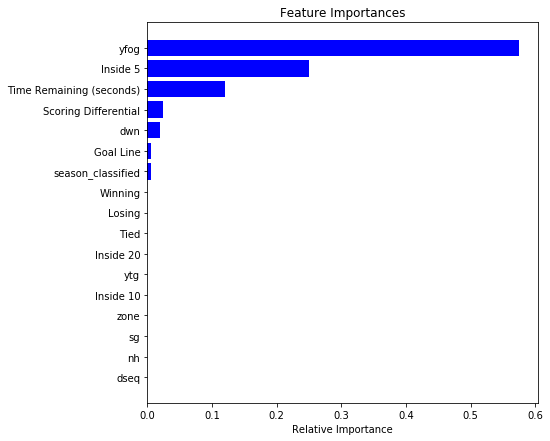

In [317]:
feature_importances = pd.DataFrame(best_rf.feature_importances_,
                                   index = x_train_trees.columns,
                                    columns=['importance']).sort_values('importance',ascending=True)

plt.figure(figsize=(7,7))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances.loc[:,'importance'], color='b', align='center',)
plt.yticks(range(len(feature_importances)),feature_importances.index)
plt.xlabel('Relative Importance')

In [318]:
filename = 'WR_Runs_finalized_model.sav'
pickle.dump(WR_runs_grid_search_rf, open(filename, 'wb'))

# Modelling Opportunity Score for WR Targets

In [396]:
RB_receiver = RB_receiver[['gid','Receiver','Receiver Position','off','def','dseq','Time Remaining (seconds)','Scoring Differential','Winning','Losing','Tied','dwn','ytg','air_yards','yfog','zone','sg','nh','season_classified','Goal Line','Inside 5','Inside 10','Inside 20','Rec_FP']]
QB_receiver = QB_receiver[['gid','Receiver','Receiver Position','off','def','dseq','Time Remaining (seconds)','Scoring Differential','Winning','Losing','Tied','dwn','ytg','air_yards','yfog','zone','sg','nh','season_classified','Goal Line','Inside 5','Inside 10','Inside 20','Rec_FP']]
WR_receiver = WR_receiver[['gid','Receiver','Receiver Position','off','def','dseq','Time Remaining (seconds)','Scoring Differential','Winning','Losing','Tied','dwn','ytg','air_yards','yfog','zone','sg','nh','season_classified','Goal Line','Inside 5','Inside 10','Inside 20','Rec_FP']]
TE_receiver = TE_receiver[['gid','Receiver','Receiver Position','off','def','dseq','Time Remaining (seconds)','Scoring Differential','Winning','Losing','Tied','dwn','ytg','air_yards','yfog','zone','sg','nh','season_classified','Goal Line','Inside 5','Inside 10','Inside 20','Rec_FP']]

In [333]:
print("Total RB Runs from 2010-2017: "+ str(len(WR_receiver)))

Total RB Runs from 2010-2017: 76067


In [368]:
WR_receiver = WR_receiver.set_index(['gid','Receiver','Receiver Position','off','def'])

In [369]:
WR_receiver_linear = WR_receiver
WR_receiver_linear['2010'] = WR_receiver_linear['season_classified'].apply(lambda x: 1 if x==1 else 0)
WR_receiver_linear['2011'] = WR_receiver_linear['season_classified'].apply(lambda x: 1 if x==2 else 0)
WR_receiver_linear['2012'] = WR_receiver_linear['season_classified'].apply(lambda x: 1 if x==3 else 0)
WR_receiver_linear['2013'] = WR_receiver_linear['season_classified'].apply(lambda x: 1 if x==4 else 0)
WR_receiver_linear['2014'] = WR_receiver_linear['season_classified'].apply(lambda x: 1 if x==5 else 0)
WR_receiver_linear['2015'] = WR_receiver_linear['season_classified'].apply(lambda x: 1 if x==6 else 0)
WR_receiver_linear['2016'] = WR_receiver_linear['season_classified'].apply(lambda x: 1 if x==7 else 0)
WR_receiver_linear = WR_receiver_linear.drop(columns=['season_classified','Rec_FP'])
WR_receiver_linear['Rec_FP']=WR_receiver['Rec_FP']

In [371]:
linear_model = lm.LinearRegression()

train, evaluation = train_test_split(WR_receiver_linear, test_size = 0.3,random_state=123)
x_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1:]
x_evaluation = evaluation.iloc[:,:-1]
y_evaluation = evaluation.iloc[:,-1:]

in_sample_scores=[]
out_of_sample_scores=[]
for train_index, test_index  in kf.split(train):
    linear_model.fit(x_train.iloc[train_index],y_train.iloc[train_index])
    in_sample_scores.append(linear_model.score(x_train.iloc[train_index],y_train.iloc[train_index]))
    out_of_sample_scores.append(linear_model.score(x_train.iloc[test_index],y_train.iloc[test_index]))
print("In Sample Logistic Regression Score:" + str(np.asarray(in_sample_scores).mean()))
print("Out of Sample Logistic Regression Score: " + str(np.asarray(out_of_sample_scores).mean()))

In Sample Logistic Regression Score:0.055213582907782624
Out of Sample Logistic Regression Score: 0.05312878261003688


# Random Forest and Gradient Boosted Tree Models

Random Forest

In [348]:
train, evaluation = train_test_split(WR_receiver, test_size = 0.3,random_state=123)
x_train_trees = train.iloc[:,:-1]
y_train_trees = train.iloc[:,-1:]
x_evaluation_trees = evaluation.iloc[:,:-1]
y_evaluation_trees = evaluation.iloc[:,-1:]

WR_receiver_grid_search_rf = sk_ms.GridSearchCV( estimator = RandomForestRegressor(n_estimators=200, random_state=123),
                        param_grid = {'max_depth':[1,2,3,4,5,6,7,8,9,10]},
                        scoring = 'r2',
                        cv = sk_ms.KFold(n_splits = 5, shuffle = True, random_state = 123),
                        refit = True,
                        return_train_score = True)

WR_receiver_grid_search_rf = grid_search_rf.fit(X = x_train_trees,
                                            y = y_train_trees)

C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528:

C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528:

In [351]:
WR_receiver_grid_search_rf.best_params_

{'max_depth': 10}

In [352]:
best_predictions = WR_receiver_grid_search_rf.predict(x_evaluation_trees)

print( r2_score( y_evaluation_trees, best_predictions ) )

0.07075814972973127


Gradient Boosting

In [353]:
# Note the depths we'll want to test
max_depths = [1, 2, 3, 4, 5]

# Create a list to store the best out-of-sample score and
# the optimal number of trees for each tree depth
output = { i : {'score':None, 'n_trees':None} for i in max_depths}

# Specify the maximum number of trees
max_trees = 200

In [354]:
for i in max_depths:
    # Create a list to store staged predictions for the models
    # in each of the folds, as well as the true outcomes
    staged_preds = []
    
    # Create the folds
    folds = sk_ms.KFold(n_splits = 5, shuffle = True, random_state = 123)
    
    # Go through each fold and train a model
    for train_index, test_index in folds.split(train):
        WR_receiver_GBR_model = GradientBoostingRegressor(n_estimators = max_trees,
                                              max_depth = i,
                                              learning_rate = 0.1,
                                              random_state = 123)
        WR_receiver_GBR_model.fit(x_train_trees.iloc[train_index], y_train_trees.iloc[train_index] )
        
        staged_preds.append( {'staged_preds':list(WR_receiver_GBR_model.staged_predict( x_train_trees.iloc[test_index] )),
                                  'true_outcomes':y_train_trees.iloc[test_index].copy() } )
    
    # Now find the average over all five folds for each number
    # of possible trees
    scores = np.zeros(max_trees)
    for j in range(max_trees):
        
        for fold in staged_preds:
            pred_outcomes = [k for k in fold['staged_preds'][j]]
            
            scores[j] = scores[j] + r2_score( fold['true_outcomes'].values, pred_outcomes )
    
        scores[j] = scores[j] * 1.0 / 5
    
    # Find the optimal number of trees for this depth
    best_n_trees = np.argmax(scores)
    
    # Output the result
    output[i]['n_trees'] = best_n_trees + 1
    output[i]['score'] = scores[best_n_trees]

C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

In [355]:
# Find the best tree depth and and re-fit it on the full
# training data
best_score = max([output[i]['score'] for i in output])
best_depth = [i for i in output if output[i]['score'] == best_score][0]
print(f'Best depth:      {best_depth}')
print(f'Number of trees: {output[best_depth]["n_trees"]}')

Best depth:      3
Number of trees: 164


In [356]:
WR_receiver_boosted_tree = GradientBoostingRegressor(n_estimators = output[best_depth]['n_trees'],
                                                                  max_depth = best_depth,
                                                                  learning_rate = 0.1,
                                                                  random_state = 123)
WR_receiver_boosted_tree = boosted_tree.fit(x_train_trees, y_train_trees)
print("QB_runs boosted tree score: " + str(WR_receiver_boosted_tree.score(x_evaluation_trees,y_evaluation_trees)))

C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


QB_runs boosted tree score: 0.051068318891428266


In [357]:
best_rf = WR_receiver_grid_search_rf.best_estimator_

Text(0.5, 0, 'Relative Importance')

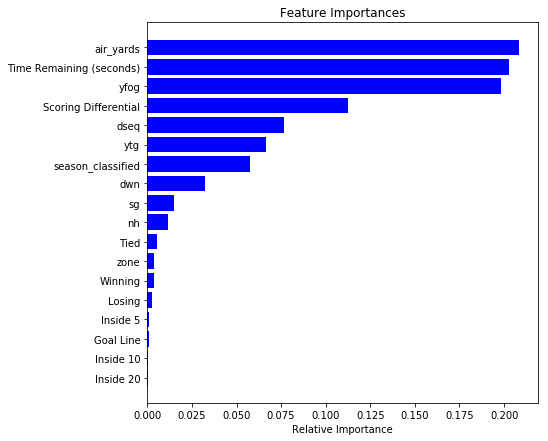

In [358]:
feature_importances = pd.DataFrame(best_rf.feature_importances_,
                                   index = x_train_trees.columns,
                                    columns=['importance']).sort_values('importance',ascending=True)

plt.figure(figsize=(7,7))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances.loc[:,'importance'], color='b', align='center',)
plt.yticks(range(len(feature_importances)),feature_importances.index)
plt.xlabel('Relative Importance')

In [359]:
filename = 'WR_receiver_finalized_model.sav'
pickle.dump(WR_receiver_grid_search_rf, open(filename, 'wb'))

# Modelling Opportunity Score for RB Targets

In [362]:
print("Total RB Runs from 2010-2017: "+ str(len(RB_receiver)))

Total RB Runs from 2010-2017: 25037


In [380]:
RB_receiver = RB_receiver.set_index(['gid','Receiver','Receiver Position','off','def'])

In [373]:
RB_receiver_linear = RB_receiver
RB_receiver_linear['2010'] = RB_receiver_linear['season_classified'].apply(lambda x: 1 if x==1 else 0)
RB_receiver_linear['2011'] = RB_receiver_linear['season_classified'].apply(lambda x: 1 if x==2 else 0)
RB_receiver_linear['2012'] = RB_receiver_linear['season_classified'].apply(lambda x: 1 if x==3 else 0)
RB_receiver_linear['2013'] = RB_receiver_linear['season_classified'].apply(lambda x: 1 if x==4 else 0)
RB_receiver_linear['2014'] = RB_receiver_linear['season_classified'].apply(lambda x: 1 if x==5 else 0)
RB_receiver_linear['2015'] = RB_receiver_linear['season_classified'].apply(lambda x: 1 if x==6 else 0)
RB_receiver_linear['2016'] = RB_receiver_linear['season_classified'].apply(lambda x: 1 if x==7 else 0)
RB_receiver_linear = RB_receiver_linear.drop(columns=['season_classified','Rec_FP'])
RB_receiver_linear['Rec_FP']=RB_receiver['Rec_FP']

In [374]:
linear_model = lm.LinearRegression()

train, evaluation = train_test_split(RB_receiver_linear, test_size = 0.3,random_state=123)
x_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1:]
x_evaluation = evaluation.iloc[:,:-1]
y_evaluation = evaluation.iloc[:,-1:]

in_sample_scores=[]
out_of_sample_scores=[]
for train_index, test_index  in kf.split(train):
    linear_model.fit(x_train.iloc[train_index],y_train.iloc[train_index])
    in_sample_scores.append(linear_model.score(x_train.iloc[train_index],y_train.iloc[train_index]))
    out_of_sample_scores.append(linear_model.score(x_train.iloc[test_index],y_train.iloc[test_index]))
print("In Sample Logistic Regression Score:" + str(np.asarray(in_sample_scores).mean()))
print("Out of Sample Logistic Regression Score: " + str(np.asarray(out_of_sample_scores).mean()))

In Sample Logistic Regression Score:0.04597450936477594
Out of Sample Logistic Regression Score: 0.03997414787162219


# Random Forest and Gradient Boosted Tree Models

Random Forest

In [381]:
train, evaluation = train_test_split(RB_receiver, test_size = 0.3,random_state=123)
x_train_trees = train.iloc[:,:-1]
y_train_trees = train.iloc[:,-1:]
x_evaluation_trees = evaluation.iloc[:,:-1]
y_evaluation_trees = evaluation.iloc[:,-1:]

RB_receiver_grid_search_rf = sk_ms.GridSearchCV( estimator = RandomForestRegressor(n_estimators=200, random_state=123),
                        param_grid = {'max_depth':[1,2,3,4,5,6,7,8,9,10]},
                        scoring = 'r2',
                        cv = sk_ms.KFold(n_splits = 5, shuffle = True, random_state = 123),
                        refit = True,
                        return_train_score = True)

RB_receiver_grid_search_rf = grid_search_rf.fit(X = x_train_trees,
                                            y = y_train_trees)

C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528:

C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528:

In [382]:
RB_receiver_grid_search_rf.best_params_

{'max_depth': 7}

In [383]:
best_predictions = RB_receiver_grid_search_rf.predict(x_evaluation_trees)

print( r2_score( y_evaluation_trees, best_predictions ) )

0.05493442933898218


In [384]:
for i in max_depths:
    # Create a list to store staged predictions for the models
    # in each of the folds, as well as the true outcomes
    staged_preds = []
    
    # Create the folds
    folds = sk_ms.KFold(n_splits = 5, shuffle = True, random_state = 123)
    
    # Go through each fold and train a model
    for train_index, test_index in folds.split(train):
        RB_receiver_GBR_model = GradientBoostingRegressor(n_estimators = max_trees,
                                              max_depth = i,
                                              learning_rate = 0.1,
                                              random_state = 123)
        RB_receiver_GBR_model.fit(x_train_trees.iloc[train_index], y_train_trees.iloc[train_index] )
        
        staged_preds.append( {'staged_preds':list(RB_receiver_GBR_model.staged_predict( x_train_trees.iloc[test_index] )),
                                  'true_outcomes':y_train_trees.iloc[test_index].copy() } )
    
    # Now find the average over all five folds for each number
    # of possible trees
    scores = np.zeros(max_trees)
    for j in range(max_trees):
        
        for fold in staged_preds:
            pred_outcomes = [k for k in fold['staged_preds'][j]]
            
            scores[j] = scores[j] + r2_score( fold['true_outcomes'].values, pred_outcomes )
    
        scores[j] = scores[j] * 1.0 / 5
    
    # Find the optimal number of trees for this depth
    best_n_trees = np.argmax(scores)
    
    # Output the result
    output[i]['n_trees'] = best_n_trees + 1
    output[i]['score'] = scores[best_n_trees]

C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

In [385]:
# Find the best tree depth and and re-fit it on the full
# training data
best_score = max([output[i]['score'] for i in output])
best_depth = [i for i in output if output[i]['score'] == best_score][0]
print(f'Best depth:      {best_depth}')
print(f'Number of trees: {output[best_depth]["n_trees"]}')

Best depth:      2
Number of trees: 60


In [386]:
RB_receiver_boosted_tree = GradientBoostingRegressor(n_estimators = output[best_depth]['n_trees'],
                                                                  max_depth = best_depth,
                                                                  learning_rate = 0.1,
                                                                  random_state = 123)
RB_receiver_boosted_tree = RB_receiver_boosted_tree.fit(x_train_trees, y_train_trees)
print("RB_runs boosted tree score: " + str(RB_receiver_boosted_tree.score(x_evaluation_trees,y_evaluation_trees)))

C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


QB_runs boosted tree score: 0.046412356090825835


In [387]:
best_rf = RB_receiver_grid_search_rf.best_estimator_

Text(0.5, 0, 'Relative Importance')

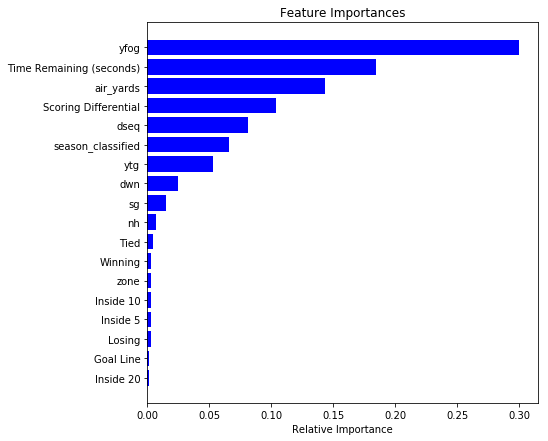

In [388]:
feature_importances = pd.DataFrame(best_rf.feature_importances_,
                                   index = x_train_trees.columns,
                                    columns=['importance']).sort_values('importance',ascending=True)

plt.figure(figsize=(7,7))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances.loc[:,'importance'], color='b', align='center',)
plt.yticks(range(len(feature_importances)),feature_importances.index)
plt.xlabel('Relative Importance')

In [389]:
filename = 'RB_receiver_finalized_model.sav'
pickle.dump(RB_receiver_grid_search_rf, open(filename, 'wb'))

# Modelling Opportunity Score for TE Targets

In [390]:
print("Total RB Runs from 2010-2017: "+ str(len(TE_receiver)))

Total RB Runs from 2010-2017: 27303


In [397]:
TE_receiver = TE_receiver.set_index(['gid','Receiver','Receiver Position','off','def'])

In [392]:
TE_receiver_linear = TE_receiver
TE_receiver_linear['2010'] = TE_receiver_linear['season_classified'].apply(lambda x: 1 if x==1 else 0)
TE_receiver_linear['2011'] = TE_receiver_linear['season_classified'].apply(lambda x: 1 if x==2 else 0)
TE_receiver_linear['2012'] = TE_receiver_linear['season_classified'].apply(lambda x: 1 if x==3 else 0)
TE_receiver_linear['2013'] = TE_receiver_linear['season_classified'].apply(lambda x: 1 if x==4 else 0)
TE_receiver_linear['2014'] = TE_receiver_linear['season_classified'].apply(lambda x: 1 if x==5 else 0)
TE_receiver_linear['2015'] = TE_receiver_linear['season_classified'].apply(lambda x: 1 if x==6 else 0)
TE_receiver_linear['2016'] = TE_receiver_linear['season_classified'].apply(lambda x: 1 if x==7 else 0)
TE_receiver_linear = TE_receiver_linear.drop(columns=['season_classified','Rec_FP'])
TE_receiver_linear['Rec_FP']=TE_receiver['Rec_FP']

In [393]:
linear_model = lm.LinearRegression()

train, evaluation = train_test_split(TE_receiver_linear, test_size = 0.3,random_state=123)
x_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1:]
x_evaluation = evaluation.iloc[:,:-1]
y_evaluation = evaluation.iloc[:,-1:]

in_sample_scores=[]
out_of_sample_scores=[]
for train_index, test_index  in kf.split(train):
    linear_model.fit(x_train.iloc[train_index],y_train.iloc[train_index])
    in_sample_scores.append(linear_model.score(x_train.iloc[train_index],y_train.iloc[train_index]))
    out_of_sample_scores.append(linear_model.score(x_train.iloc[test_index],y_train.iloc[test_index]))
print("In Sample Logistic Regression Score:" + str(np.asarray(in_sample_scores).mean()))
print("Out of Sample Logistic Regression Score: " + str(np.asarray(out_of_sample_scores).mean()))

In Sample Logistic Regression Score:0.10510197165097943
Out of Sample Logistic Regression Score: 0.09939927616359327


# Random Forest and Gradient Boosted Tree Models

In [398]:
train, evaluation = train_test_split(TE_receiver, test_size = 0.3,random_state=123)
x_train_trees = train.iloc[:,:-1]
y_train_trees = train.iloc[:,-1:]
x_evaluation_trees = evaluation.iloc[:,:-1]
y_evaluation_trees = evaluation.iloc[:,-1:]

TE_receiver_grid_search_rf = sk_ms.GridSearchCV( estimator = RandomForestRegressor(n_estimators=200, random_state=123),
                        param_grid = {'max_depth':[1,2,3,4,5,6,7,8,9,10]},
                        scoring = 'r2',
                        cv = sk_ms.KFold(n_splits = 5, shuffle = True, random_state = 123),
                        refit = True,
                        return_train_score = True)

TE_receiver_grid_search_rf = grid_search_rf.fit(X = x_train_trees,
                                            y = y_train_trees)

C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528:

C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528:

In [399]:
TE_receiver_grid_search_rf.best_params_

{'max_depth': 10}

In [400]:
best_predictions = TE_receiver_grid_search_rf.predict(x_evaluation_trees)

print( r2_score( y_evaluation_trees, best_predictions ) )

0.16841757965633153


In [401]:
# Note the depths we'll want to test
max_depths = [1, 2, 3, 4, 5]

# Create a list to store the best out-of-sample score and
# the optimal number of trees for each tree depth
output = { i : {'score':None, 'n_trees':None} for i in max_depths}

# Specify the maximum number of trees
max_trees = 200

In [402]:
for i in max_depths:
    # Create a list to store staged predictions for the models
    # in each of the folds, as well as the true outcomes
    staged_preds = []
    
    # Create the folds
    folds = sk_ms.KFold(n_splits = 5, shuffle = True, random_state = 123)
    
    # Go through each fold and train a model
    for train_index, test_index in folds.split(train):
        RB_receiver_GBR_model = GradientBoostingRegressor(n_estimators = max_trees,
                                              max_depth = i,
                                              learning_rate = 0.1,
                                              random_state = 123)
        RB_receiver_GBR_model.fit(x_train_trees.iloc[train_index], y_train_trees.iloc[train_index] )
        
        staged_preds.append( {'staged_preds':list(RB_receiver_GBR_model.staged_predict( x_train_trees.iloc[test_index] )),
                                  'true_outcomes':y_train_trees.iloc[test_index].copy() } )
    
    # Now find the average over all five folds for each number
    # of possible trees
    scores = np.zeros(max_trees)
    for j in range(max_trees):
        
        for fold in staged_preds:
            pred_outcomes = [k for k in fold['staged_preds'][j]]
            
            scores[j] = scores[j] + r2_score( fold['true_outcomes'].values, pred_outcomes )
    
        scores[j] = scores[j] * 1.0 / 5
    
    # Find the optimal number of trees for this depth
    best_n_trees = np.argmax(scores)
    
    # Output the result
    output[i]['n_trees'] = best_n_trees + 1
    output[i]['score'] = scores[best_n_trees]

C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

In [403]:
# Find the best tree depth and and re-fit it on the full
# training data
best_score = max([output[i]['score'] for i in output])
best_depth = [i for i in output if output[i]['score'] == best_score][0]
print(f'Best depth:      {best_depth}')
print(f'Number of trees: {output[best_depth]["n_trees"]}')

Best depth:      3
Number of trees: 43


In [404]:
TE_receiver_boosted_tree = GradientBoostingRegressor(n_estimators = output[best_depth]['n_trees'],
                                                                  max_depth = best_depth,
                                                                  learning_rate = 0.1,
                                                                  random_state = 123)
TE_receiver_boosted_tree = TE_receiver_boosted_tree.fit(x_train_trees, y_train_trees)
print("TE_targets boosted tree score: " + str(TE_receiver_boosted_tree.score(x_evaluation_trees,y_evaluation_trees)))

C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


QB_runs boosted tree score: 0.13396828107296987


In [405]:
best_rf = TE_receiver_grid_search_rf.best_estimator_

Text(0.5, 0, 'Relative Importance')

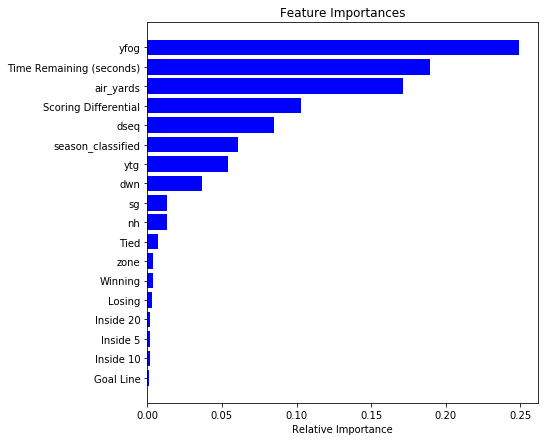

In [406]:
feature_importances = pd.DataFrame(best_rf.feature_importances_,
                                   index = x_train_trees.columns,
                                    columns=['importance']).sort_values('importance',ascending=True)

plt.figure(figsize=(7,7))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances.loc[:,'importance'], color='b', align='center',)
plt.yticks(range(len(feature_importances)),feature_importances.index)
plt.xlabel('Relative Importance')

In [407]:
filename = 'TE_receiver_finalized_model.sav'
pickle.dump(TE_receiver_grid_search_rf, open(filename, 'wb'))

# Modelling Opportunity Score for QB Passes

In [416]:
QB_passes = QB_passes[['gid','Passer','Passer Position','off','def','dseq','Time Remaining (seconds)','Scoring Differential','Winning','Losing','Tied','dwn','ytg','air_yards','yfog','zone','sg','nh','season_classified','Goal Line','Inside 5','Inside 10','Inside 20','Pass_FP']]

In [409]:
print("Total QB Passes from 2010-2017: "+ str(len(QB_passes)))

Total QB Passes from 2010-2017: 138992


In [417]:
QB_passes = QB_passes.set_index(['gid','Passer','Passer Position','off','def'])

In [413]:
QB_passes_linear = QB_passes
QB_passes_linear['2010'] = QB_passes_linear['season_classified'].apply(lambda x: 1 if x==1 else 0)
QB_passes_linear['2011'] = QB_passes_linear['season_classified'].apply(lambda x: 1 if x==2 else 0)
QB_passes_linear['2012'] = QB_passes_linear['season_classified'].apply(lambda x: 1 if x==3 else 0)
QB_passes_linear['2013'] = QB_passes_linear['season_classified'].apply(lambda x: 1 if x==4 else 0)
QB_passes_linear['2014'] = QB_passes_linear['season_classified'].apply(lambda x: 1 if x==5 else 0)
QB_passes_linear['2015'] = QB_passes_linear['season_classified'].apply(lambda x: 1 if x==6 else 0)
QB_passes_linear['2016'] = QB_passes_linear['season_classified'].apply(lambda x: 1 if x==7 else 0)
QB_passes_linear = QB_passes_linear.drop(columns=['season_classified','Pass_FP'])
QB_passes_linear['Pass_FP']=QB_passes['Pass_FP']

In [414]:
linear_model = lm.LinearRegression()

train, evaluation = train_test_split(QB_passes_linear, test_size = 0.3,random_state=123)
x_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1:]
x_evaluation = evaluation.iloc[:,:-1]
y_evaluation = evaluation.iloc[:,-1:]

in_sample_scores=[]
out_of_sample_scores=[]
for train_index, test_index  in kf.split(train):
    linear_model.fit(x_train.iloc[train_index],y_train.iloc[train_index])
    in_sample_scores.append(linear_model.score(x_train.iloc[train_index],y_train.iloc[train_index]))
    out_of_sample_scores.append(linear_model.score(x_train.iloc[test_index],y_train.iloc[test_index]))
print("In Sample Logistic Regression Score:" + str(np.asarray(in_sample_scores).mean()))
print("Out of Sample Logistic Regression Score: " + str(np.asarray(out_of_sample_scores).mean()))

In Sample Logistic Regression Score:0.11442881755046923
Out of Sample Logistic Regression Score: 0.1135860628762323


# Random Forest and Gradient Boosted Tree Models

In [418]:
train, evaluation = train_test_split(QB_passes, test_size = 0.3,random_state=123)
x_train_trees = train.iloc[:,:-1]
y_train_trees = train.iloc[:,-1:]
x_evaluation_trees = evaluation.iloc[:,:-1]
y_evaluation_trees = evaluation.iloc[:,-1:]

QB_passes_grid_search_rf = sk_ms.GridSearchCV( estimator = RandomForestRegressor(n_estimators=200, random_state=123),
                        param_grid = {'max_depth':[1,2,3,4,5,6,7,8,9,10]},
                        scoring = 'r2',
                        cv = sk_ms.KFold(n_splits = 5, shuffle = True, random_state = 123),
                        refit = True,
                        return_train_score = True)

QB_passes_grid_search_rf = grid_search_rf.fit(X = x_train_trees,
                                            y = y_train_trees)

C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528:

C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528:

In [419]:
QB_passes_grid_search_rf.best_params_

{'max_depth': 10}

In [420]:
best_predictions = QB_passes_grid_search_rf.predict(x_evaluation_trees)

print( r2_score( y_evaluation_trees, best_predictions ) )

0.15467719874985653


In [421]:
# Note the depths we'll want to test
max_depths = [1, 2, 3, 4, 5]

# Create a list to store the best out-of-sample score and
# the optimal number of trees for each tree depth
output = { i : {'score':None, 'n_trees':None} for i in max_depths}

# Specify the maximum number of trees
max_trees = 200

In [422]:
for i in max_depths:
    # Create a list to store staged predictions for the models
    # in each of the folds, as well as the true outcomes
    staged_preds = []
    
    # Create the folds
    folds = sk_ms.KFold(n_splits = 5, shuffle = True, random_state = 123)
    
    # Go through each fold and train a model
    for train_index, test_index in folds.split(train):
        QB_passes_GBR_model = GradientBoostingRegressor(n_estimators = max_trees,
                                              max_depth = i,
                                              learning_rate = 0.1,
                                              random_state = 123)
        QB_passes_GBR_model.fit(x_train_trees.iloc[train_index], y_train_trees.iloc[train_index] )
        
        staged_preds.append( {'staged_preds':list(QB_passes_GBR_model.staged_predict( x_train_trees.iloc[test_index] )),
                                  'true_outcomes':y_train_trees.iloc[test_index].copy() } )
    
    # Now find the average over all five folds for each number
    # of possible trees
    scores = np.zeros(max_trees)
    for j in range(max_trees):
        
        for fold in staged_preds:
            pred_outcomes = [k for k in fold['staged_preds'][j]]
            
            scores[j] = scores[j] + r2_score( fold['true_outcomes'].values, pred_outcomes )
    
        scores[j] = scores[j] * 1.0 / 5
    
    # Find the optimal number of trees for this depth
    best_n_trees = np.argmax(scores)
    
    # Output the result
    output[i]['n_trees'] = best_n_trees + 1
    output[i]['score'] = scores[best_n_trees]

C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

In [423]:
# Find the best tree depth and and re-fit it on the full
# training data
best_score = max([output[i]['score'] for i in output])
best_depth = [i for i in output if output[i]['score'] == best_score][0]
print(f'Best depth:      {best_depth}')
print(f'Number of trees: {output[best_depth]["n_trees"]}')

Best depth:      5
Number of trees: 57


In [424]:
QB_passes_boosted_tree = GradientBoostingRegressor(n_estimators = output[best_depth]['n_trees'],
                                                                  max_depth = best_depth,
                                                                  learning_rate = 0.1,
                                                                  random_state = 123)
QB_passes_boosted_tree = QB_passes_boosted_tree.fit(x_train_trees, y_train_trees)
print("QB_passes boosted tree score: " + str(QB_passes_boosted_tree.score(x_evaluation_trees,y_evaluation_trees)))

C:\Users\Maxwell Glassman\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


QB_passes boosted tree score: 0.14899583848096454


In [425]:
best_rf = QB_passes_grid_search_rf.best_estimator_

Text(0.5, 0, 'Relative Importance')

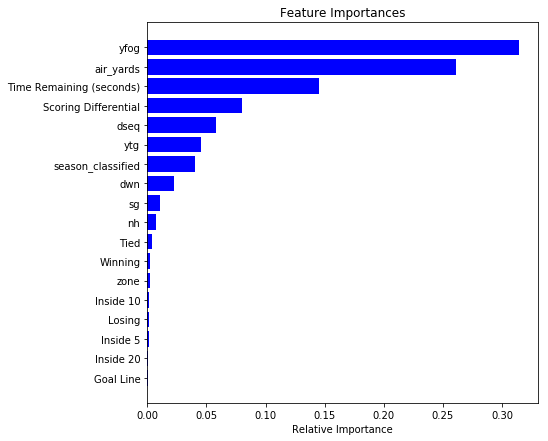

In [426]:
feature_importances = pd.DataFrame(best_rf.feature_importances_,
                                   index = x_train_trees.columns,
                                    columns=['importance']).sort_values('importance',ascending=True)

plt.figure(figsize=(7,7))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances.loc[:,'importance'], color='b', align='center',)
plt.yticks(range(len(feature_importances)),feature_importances.index)
plt.xlabel('Relative Importance')

In [427]:
filename = 'QB_passes_finalized_model.sav'
pickle.dump(QB_passes_grid_search_rf, open(filename, 'wb'))